In [36]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#options
pd.options.display.max_columns = None

In [38]:
#imports datasets
zip_json = pd.read_json("DatasetsImmo/zipcode-belgium.json")
RA_data = pd.read_csv("DatasetsImmo/clean_remove_approach.csv")


In [39]:
RA_data.shape

(4918, 22)

In [40]:
zip_json.head()

,zip,city,lng,lat
0,1000,Bruxelles,4.351697,50.846557
1,1020,Laeken,4.348713,50.883392
2,1030,Schaerbeek,4.373712,50.867604
3,1040,Etterbeek,4.389510,50.836851
4,1050,Ixelles,4.381571,50.822285


In [41]:
zip_json.shape

(2757, 4)

In [42]:
del RA_data["Unnamed: 0"]

In [43]:
RA_data.head()

,id,type,subtype,price,transactionType,zip,visualisationOption,cuisine_type,constructionYear,condition,heatingType,room_number,atticExists,basementExists,hasSwimmingPool,parking intérieur,parking extérieur,short_id,company_name,mètres carrés,commune
0,9039019,apartment,apartment,1550000,for sale,1050,xl,usa hyper equipped,2017.0,as new,gas,3.0,False,False,False,0.0,1.0,2595964,lecobel vaneau vente neuf,213,Ixelles
1,9043036,apartment,apartment,195000,for sale,9600,xl,installed,2014.0,good,gas,2.0,False,False,False,0.0,0.0,1002634,immo beguin,75,Renaix
2,9042073,apartment,apartment,320000,for sale,1070,xl,usa hyper equipped,2017.0,as new,gas,3.0,False,True,False,1.0,1.0,2916018,sky realty,130,Anderlecht
3,9034494,apartment,apartment,715000,for sale,1950,xl,usa hyper equipped,2020.0,as new,gas,2.0,False,True,False,1.0,1.0,2352,latour et petit vente,126,Kraainem
4,9042950,apartment,triplex,235000,for sale,6010,xl,hyper equipped,2013.0,as new,gas,3.0,False,False,False,0.0,1.0,663882,etimo,149,Couillet


In [44]:
merged_data = RA_data.merge(zip_json, on = 'zip',how="inner",indicator=False)

In [45]:
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11865 entries, 0 to 11864
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   11865 non-null  int64  
 1   type                 11865 non-null  object 
 2   subtype              11865 non-null  object 
 3   price                11865 non-null  int64  
 4   transactionType      11865 non-null  object 
 5   zip                  11865 non-null  int64  
 6   visualisationOption  11865 non-null  object 
 7   cuisine_type         11865 non-null  object 
 8   constructionYear     11865 non-null  float64
 9   condition            11865 non-null  object 
 10  heatingType          11865 non-null  object 
 11  room_number          11865 non-null  float64
 12  atticExists          11865 non-null  bool   
 13  basementExists       11865 non-null  bool   
 14  hasSwimmingPool      11865 non-null  bool   
 15  parking intérieur    11865 non-null 

In [46]:
print(merged_data.shape)
merged_data.drop_duplicates(subset=None, keep="first",inplace=True)
print(merged_data.shape)

(11865, 24)
(11865, 24)


In [47]:
len(merged_data)

11865

In [48]:
merged_data.head()

,id,type,subtype,price,transactionType,zip,visualisationOption,cuisine_type,constructionYear,condition,heatingType,room_number,atticExists,basementExists,hasSwimmingPool,parking intérieur,parking extérieur,short_id,company_name,mètres carrés,commune,city,lng,lat
0,9039019,apartment,apartment,1550000,for sale,1050,xl,usa hyper equipped,2017.0,as new,gas,3.0,False,False,False,0.0,1.0,2595964,lecobel vaneau vente neuf,213,Ixelles,Ixelles,4.381571,50.822285
1,9040807,apartment,apartment,495000,for sale,1050,xl,hyper equipped,1960.0,good,gas,3.0,False,True,False,0.0,0.0,1607451,emile garcin belgique sprl,120,Ixelles,Ixelles,4.381571,50.822285
2,8954649,apartment,apartment,1537000,for sale,1050,xl,hyper equipped,2015.0,as new,gas,2.0,False,True,False,1.0,1.0,2352,latour et petit vente,160,Ixelles,Ixelles,4.381571,50.822285
3,8892307,apartment,apartment,1839000,for sale,1050,xl,hyper equipped,2015.0,as new,gas,3.0,False,True,False,0.0,0.0,2352,latour et petit vente,203,Ixelles,Ixelles,4.381571,50.822285
4,8855273,apartment,apartment,510000,for sale,1050,xl,usa hyper equipped,2018.0,as new,gas,3.0,False,True,False,1.0,1.0,2595964,lecobel vaneau vente neuf,116,Ixelles,Ixelles,4.381571,50.822285


In [49]:
merged_data.drop("commune",inplace=True,axis=1)

In [50]:
#merged_data.plot(kind="scatter",x="lng",y="lat")


<AxesSubplot:xlabel='lng', ylabel='lat'>

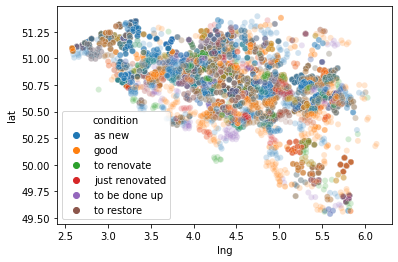

In [51]:
sns.scatterplot(data=merged_data,x="lng",y="lat",hue="condition",alpha=0.2,legend="auto")

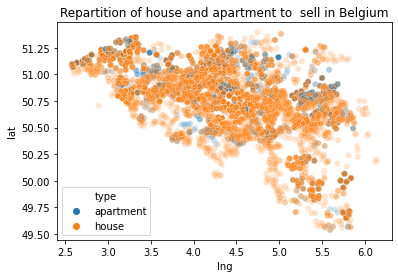

In [52]:
sns.scatterplot(data=merged_data,x="lng",y="lat",hue="type",alpha=0.2,legend="auto")
plt.title("Repartition of house and apartment to  sell in Belgium")
plt.savefig("plots/aphouseplot1.jpg",dpi=200)
plt.show()

<AxesSubplot:xlabel='lng', ylabel='lat'>

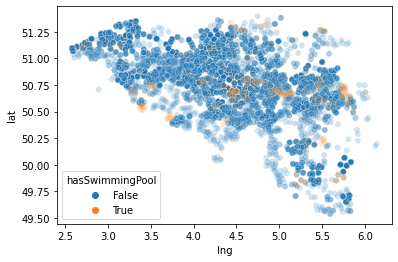

In [53]:
sns.scatterplot(data=merged_data,x="lng",y="lat",hue="hasSwimmingPool",alpha=0.2,legend="brief")

<AxesSubplot:>

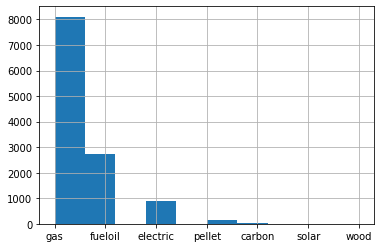

In [54]:
merged_data["heatingType"].hist()

# Exports

In [55]:
merged_data.to_csv("DatasetsImmo/RA_immoZip.csv")

# Adding communities

	1000–1299: Brussels Capital Region
	1300–1499: Walloon Brabant
	1500–1999: Flemish Brabant
	2000–2999: Antwerp
	3000–3499: Flemish Brabant (continued)
	3500–3999: Limburg
	4000–4999: Liège
	5000–5999: Namur
	6000–6599: Hainaut
	6600–6999: Luxembourg
	7000–7999: Hainaut (continued)
	8000–8999: West Flanders
	9000–9999: East Flanders

Source : [Wikipedia](https://en.wikipedia.org/wiki/List_of_postal_codes_in_Belgium)

In [56]:
def choose_communities(item_pd_series):
    if item_pd_series>=1000 and item_pd_series <=1299:
        return "Brussels Capital Region"
    if item_pd_series>=1300 and item_pd_series <=1499:
        return "Walloon Brabant"
    if item_pd_series>=1500 and item_pd_series <=1999:
        return "Flemish Brabant"
    if item_pd_series>=2000 and item_pd_series <=2999:
        return "Antwerp"
    if item_pd_series>=3000 and item_pd_series <=3499:
        return "Flemish Brabant"
    if item_pd_series>=3500 and item_pd_series <=3999:
        return "Limburg"
    if item_pd_series>=4000 and item_pd_series <=4999:
        return "Liege"
    if item_pd_series>=5000 and item_pd_series <=5999:
        return "Namur"
    if item_pd_series>=6000 and item_pd_series <=6599:
        return "Hainaut"
    if item_pd_series>=6600 and item_pd_series <=6999:
        return "Luxembourg"
    if item_pd_series>=7000 and item_pd_series <=7999:
        return "Hainaut"
    if item_pd_series>=8000 and item_pd_series <=8999:
        return "West Flanders"
    if item_pd_series>=9000 and item_pd_series <=9999:
        return "East Flanders"
    return "Mistake were made"

In [57]:
test = merged_data.zip.apply(choose_communities)

In [58]:
test

0        Brussels Capital Region
1        Brussels Capital Region
2        Brussels Capital Region
3        Brussels Capital Region
4        Brussels Capital Region
                  ...           
11860              West Flanders
11861              West Flanders
11862              East Flanders
11863              East Flanders
11864              East Flanders
Name: zip, Length: 11865, dtype: object

In [59]:
merged_data["municipalities"] = test

In [60]:
merged_data.head()

,id,type,subtype,price,transactionType,zip,visualisationOption,cuisine_type,constructionYear,condition,heatingType,room_number,atticExists,basementExists,hasSwimmingPool,parking intérieur,parking extérieur,short_id,company_name,mètres carrés,city,lng,lat,municipalities
0,9039019,apartment,apartment,1550000,for sale,1050,xl,usa hyper equipped,2017.0,as new,gas,3.0,False,False,False,0.0,1.0,2595964,lecobel vaneau vente neuf,213,Ixelles,4.381571,50.822285,Brussels Capital Region
1,9040807,apartment,apartment,495000,for sale,1050,xl,hyper equipped,1960.0,good,gas,3.0,False,True,False,0.0,0.0,1607451,emile garcin belgique sprl,120,Ixelles,4.381571,50.822285,Brussels Capital Region
2,8954649,apartment,apartment,1537000,for sale,1050,xl,hyper equipped,2015.0,as new,gas,2.0,False,True,False,1.0,1.0,2352,latour et petit vente,160,Ixelles,4.381571,50.822285,Brussels Capital Region
3,8892307,apartment,apartment,1839000,for sale,1050,xl,hyper equipped,2015.0,as new,gas,3.0,False,True,False,0.0,0.0,2352,latour et petit vente,203,Ixelles,4.381571,50.822285,Brussels Capital Region
4,8855273,apartment,apartment,510000,for sale,1050,xl,usa hyper equipped,2018.0,as new,gas,3.0,False,True,False,1.0,1.0,2595964,lecobel vaneau vente neuf,116,Ixelles,4.381571,50.822285,Brussels Capital Region


In [61]:
merged_data.to_csv("DatasetsImmo/RA_immoZip.csv")

# Adding square meter price

In [62]:
merged_data["prix mètres carrés"] = round(merged_data["price"]/merged_data["mètres carrés"],2)

In [63]:
merged_data.head()

,id,type,subtype,price,transactionType,zip,visualisationOption,cuisine_type,constructionYear,condition,heatingType,room_number,atticExists,basementExists,hasSwimmingPool,parking intérieur,parking extérieur,short_id,company_name,mètres carrés,city,lng,lat,municipalities,prix mètres carrés
0,9039019,apartment,apartment,1550000,for sale,1050,xl,usa hyper equipped,2017.0,as new,gas,3.0,False,False,False,0.0,1.0,2595964,lecobel vaneau vente neuf,213,Ixelles,4.381571,50.822285,Brussels Capital Region,7277.00
1,9040807,apartment,apartment,495000,for sale,1050,xl,hyper equipped,1960.0,good,gas,3.0,False,True,False,0.0,0.0,1607451,emile garcin belgique sprl,120,Ixelles,4.381571,50.822285,Brussels Capital Region,4125.00
2,8954649,apartment,apartment,1537000,for sale,1050,xl,hyper equipped,2015.0,as new,gas,2.0,False,True,False,1.0,1.0,2352,latour et petit vente,160,Ixelles,4.381571,50.822285,Brussels Capital Region,9606.25
3,8892307,apartment,apartment,1839000,for sale,1050,xl,hyper equipped,2015.0,as new,gas,3.0,False,True,False,0.0,0.0,2352,latour et petit vente,203,Ixelles,4.381571,50.822285,Brussels Capital Region,9059.11
4,8855273,apartment,apartment,510000,for sale,1050,xl,usa hyper equipped,2018.0,as new,gas,3.0,False,True,False,1.0,1.0,2595964,lecobel vaneau vente neuf,116,Ixelles,4.381571,50.822285,Brussels Capital Region,4396.55


In [64]:
merged_data.columns

Index(['id', 'type', 'subtype', 'price', 'transactionType', 'zip',
       'visualisationOption', 'cuisine_type', 'constructionYear', 'condition',
       'heatingType', 'room_number', 'atticExists', 'basementExists',
       'hasSwimmingPool', 'parking intérieur', 'parking extérieur', 'short_id',
       'company_name', 'mètres carrés', 'city', 'lng', 'lat', 'municipalities',
       'prix mètres carrés'],
      dtype='object')

In [65]:
len(merged_data.columns)

25

# Re-organizing the columns order for more consistency

In [66]:
final = merged_data[["price","type","subtype","constructionYear","condition","room_number","cuisine_type",
                   "heatingType","mètres carrés","prix mètres carrés","parking extérieur","atticExists","basementExists",
                    "hasSwimmingPool","zip","city","municipalities","parking intérieur","lng","lat","id","company_name"]]

In [67]:
len(final.columns)

22

In [68]:
final.head(1)

,price,type,subtype,constructionYear,condition,room_number,cuisine_type,heatingType,mètres carrés,prix mètres carrés,parking extérieur,atticExists,basementExists,hasSwimmingPool,zip,city,municipalities,parking intérieur,lng,lat,id,company_name
0,1550000,apartment,apartment,2017.0,as new,3.0,usa hyper equipped,gas,213,7277.0,1.0,False,False,False,1050,Ixelles,Brussels Capital Region,0.0,4.381571,50.822285,9039019,lecobel vaneau vente neuf


In [69]:
final.shape

(11865, 22)

In [70]:
final.to_csv("DatasetsImmo/RA_immoZip.csv")